In [1]:
from sahi.utils.yolov8 import download_yolov8s_model
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from pathlib import Path
from IPython.display import Image

In [2]:
yolov8_model_path = "models/205trainset_400epoch_model_S.pt"
download_yolov8s_model(yolov8_model_path)
"""
# Download test images
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')
"""

"\n# Download test images\ndownload_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')\ndownload_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')\n"

In [3]:

detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="0",  # 'cuda:0' cpu = "cpu"
)

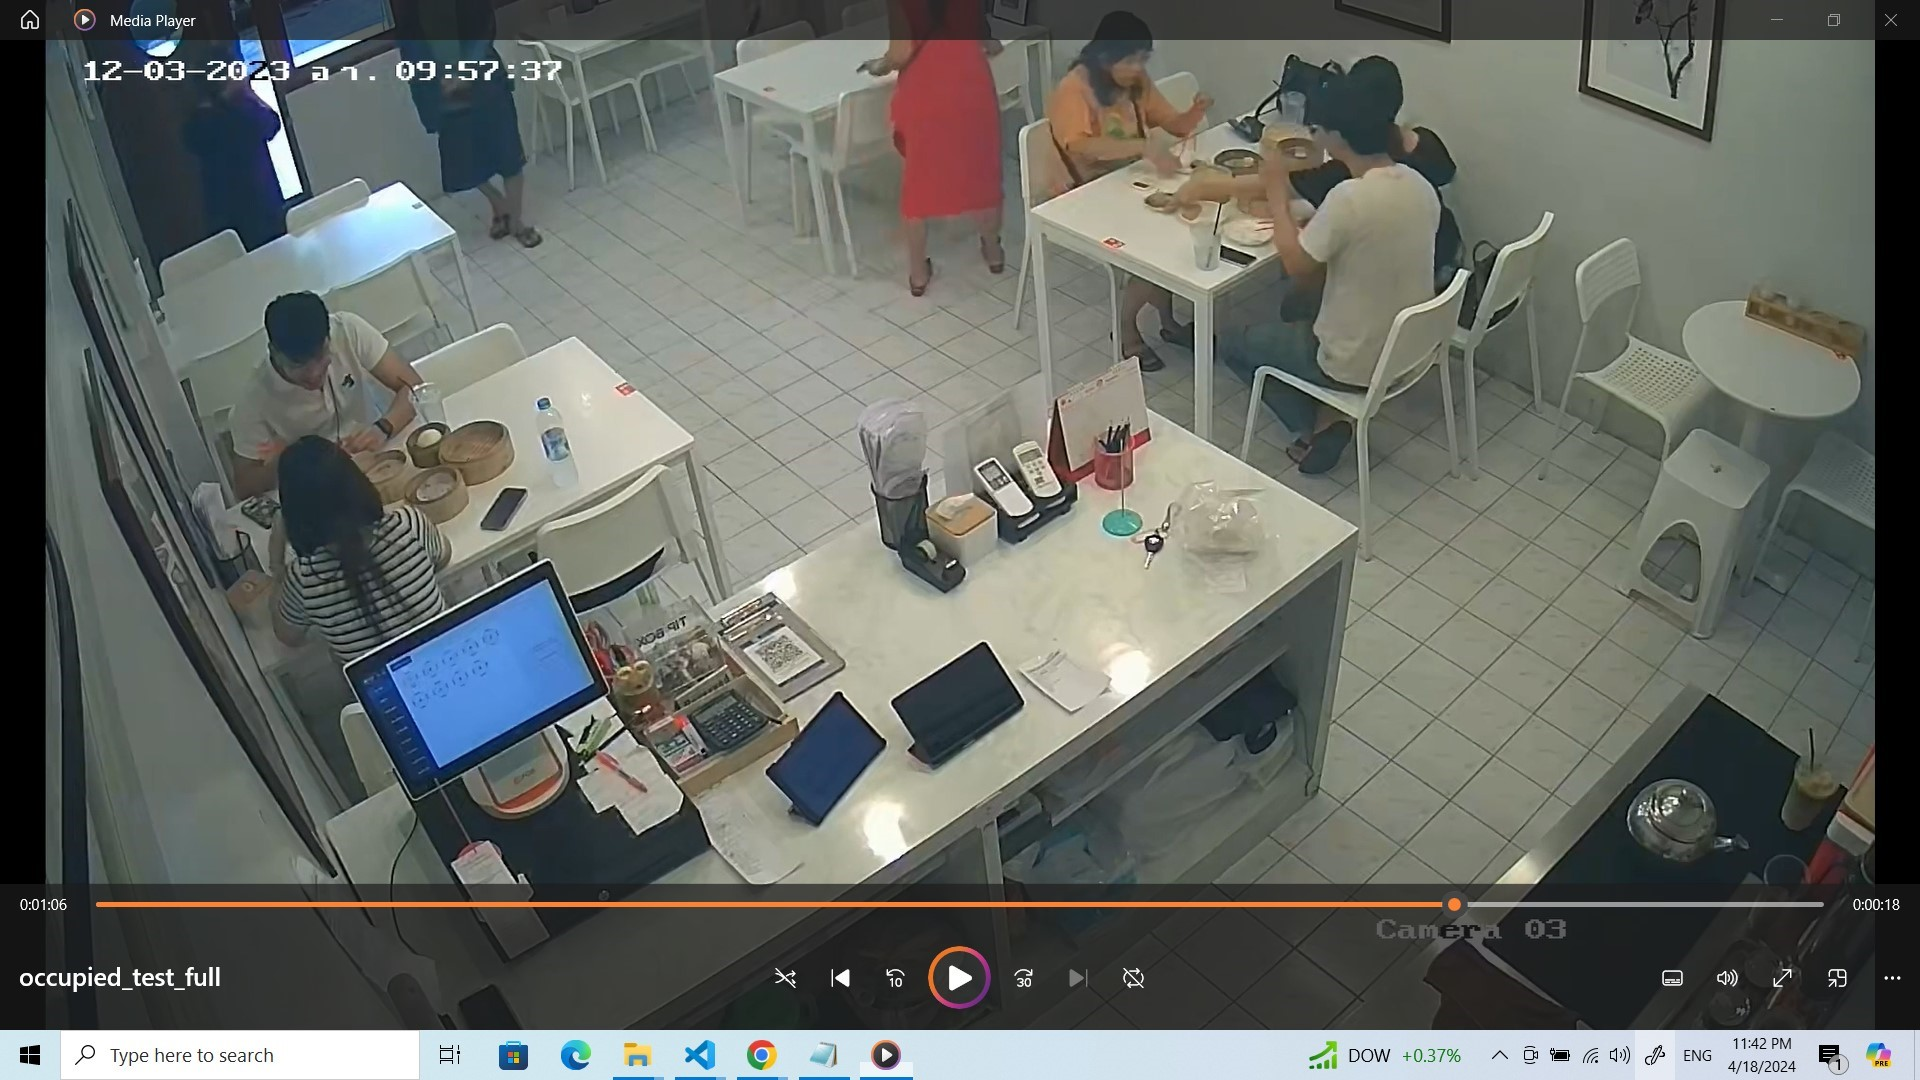

In [4]:
# With an image path
result = get_prediction("test_data/dimsum_screeenshot.jpg", detection_model)
result.export_visuals(export_dir="test_data/")
Image("test_data/prediction_visual.png")

In [5]:
result = get_sliced_prediction(
    "test_data/dimsum_screeenshot.jpg",
    detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

Performing prediction on 60 number of slices.


In [6]:
# Access the object prediction list
object_prediction_list = result.object_prediction_list

# Convert to COCO annotation, COCO prediction, imantics, and fiftyone formats
result.to_coco_annotations()[:3]
result.to_coco_predictions(image_id=1)[:3]
result.to_imantics_annotations()[:3]
result.to_fiftyone_detections()[:3]

[<Detection: {
     'id': '6623f0cd5ecdf71dc5698b9b',
     'attributes': {},
     'tags': [],
     'label': 'dimsum',
     'bounding_box': [
         0.21354166666666666,
         0.19058973524305556,
         0.13333333333333333,
         0.260373087282534,
     ],
     'mask': None,
     'confidence': 0.9530455470085144,
     'index': None,
 }>,
 <Detection: {
     'id': '6623f0cd5ecdf71dc5698b9c',
     'attributes': {},
     'tags': [],
     'label': 'dimsum',
     'bounding_box': [
         0.48161149422327676,
         0.875829717848036,
         0.03540883461634318,
         0.059343147277832034,
     ],
     'mask': None,
     'confidence': 0.9485145807266235,
     'index': None,
 }>,
 <Detection: {
     'id': '6623f0cd5ecdf71dc5698b9d',
     'attributes': {},
     'tags': [],
     'label': 'dimsum',
     'bounding_box': [
         0.7479906209434072,
         0.37962962962962965,
         0.1320143651838104,
         0.23496211016619648,
     ],
     'mask': None,
     'confide

In [7]:
predict(
    model_type="yolov8",
    model_path=yolov8_model_path,
    model_device="0",  # or 'cuda:0'
    model_confidence_threshold=0.6,
    source="test_data/dimsum_screeenshot.jpg",
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Performing prediction on 60 number of slices.


Performing inference on images: 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

Prediction time is: 3910.16 ms
Prediction results are successfully exported to runs\predict\exp10
